<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 14 **
** ┗ Business analysis **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Understanding of business analysis data」
* 🥈Session 2 -「Address -based business analysis」
* 🥇SESSION 3 -「New entry business exploration」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/14_Commercial District Analysis')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/14_Commercial District Analysis'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🗺🥪 (store manager, business analyst)

``
A brand operates a pretty good chain store.This time, the company is planning a new store.
Since most of the commercial areas have other stores, we try to select a candidate where the commercial area does not overlap as much as possible.

``


> ** Looking at the data **

* US Subway location information data
* Data specification ⬇

| Name | Street_address | City | STATE | Zip_code | Country | Latitude | Latitude |
| ----: | ---: | ----: |: ---: | ---: | ---: ---: ---: ----: |




In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter14_market_analysis.csv')
df.head(2)

name                                                url  \
0  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   
1  Subway  http://order.subway.com/Stores/Redirect.aspx?s...   

          street_address        city state zip_code country  phone_number_1  \
0  1800 Duke St, Ste 100  Alexandria    VA    22314     USA             NaN   
1          1512 King St,  Alexandria    VA    22301     USA             NaN   

   phone_number_2  fax_1  ...  email_2  website  \
0             NaN    NaN  ...      NaN      NaN   
1             NaN    NaN  ...      NaN      NaN   

                                          open_hours  latitude longitude  \
0  Monday 7:00 AM - 7:00 PM, Tuesday 7:00 AM - 7:...   38.8043  -77.0611   
1  Sunday 9:00 AM - 8:00 PM, Monday 7:00 AM - 9:0...   38.8062  -77.0565   

   facebook  twitter  instagram  pinterest  youtube  
0       NaN      NaN        NaN        NaN      NaN  
1       NaN      NaN        NaN        NaN      NaN  

[2 rows x 22 columns]


## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Unclear areas of core stores
``

> ** Expected effect **

``
▶ Confirmation of a core store entry area
``

> ** Solution **

``
▶ Selection of location through business analysis
▶ Session 1 🥉
-Data pretreatment and commercial data (latitude, hardness) understand
▶ Session 2 🥈
-State, city
▶ Session 3 🥇
-Standium strategy planning after the hypothesis
``

> ** Performance measurement **

``
▶ Sales monitoring after entering the store
``

> ** Public application **

``
▶ Definition of key customers and core business districts
▶ Identify the form of consumption of core rights
▶ Competitor analysis (※ Strength/weakness compared to competitors)
▶ Strategic planning after entering
``

> ** Main code preview **

``
▶ Session 1 → Folium.map (Location = [,]), MarkerCluster ()
▶ Session 2 → plt.bar, reset_index (), pd.merge ()
▶ Session 3 → STR.CONTAINS ()
``


## ** 🥉Session 1 **
** ┗ Understanding business analysis data **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ 25,533 row, 22 cola
print('df', df.shape)

df (25533, 22)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25533 entries, 0 to 25532
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            25533 non-null  object 
 1   url             24017 non-null  object 
 2   street_address  25533 non-null  object 
 3   city            25533 non-null  object 
 4   state           25533 non-null  object 
 5   zip_code        25533 non-null  object 
 6   country         25533 non-null  object 
 7   phone_number_1  0 non-null      float64
 8   phone_number_2  0 non-null      float64
 9   fax_1           0 non-null      float64
 10  fax_2           0 non-null      float64
 11  email_1         0 non-null      float64
 12  email_2         0 non-null      float64
 13  website         0 non-null      float64
 14  open_hours      25395 non-null  object 
 15  latitude        25533 non-null  float64
 16  longitude       25533 non-null  float64
 17  facebook        0 non-null     

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

name                  0
url                1516
street_address        0
city                  0
state                 0
zip_code              0
country               0
phone_number_1    25533
phone_number_2    25533
fax_1             25533
fax_2             25533
email_1           25533
email_2           25533
website           25533
open_hours          138
latitude              0
longitude             0
facebook          25533
twitter           25533
instagram         25533
pinterest         25533
youtube           25533
dtype: int64


### · Commercial analysis data
---


In [ ]:
# ▶ Extract only the necessary data
df=df[['name', 'street_address','city','state', 'zip_code', 'country', 'latitude', 'longitude']]
df.head(5)

name                                  street_address        city state  \
0  Subway                           1800 Duke St, Ste 100  Alexandria    VA   
1  Subway                                   1512 King St,  Alexandria    VA   
2  Subway                            2361 Eisenhower Ave,  Alexandria    VA   
3  Subway                      320 King Street, 1st Floor  Alexandria    VA   
4  Subway  5836 N. Kings Hwy, Suite A, Huntington Station  Alexandria    VA   

  zip_code country  latitude  longitude  
0    22314     USA   38.8043   -77.0611  
1    22301     USA   38.8062   -77.0565  
2    22314     USA   38.8012   -77.0691  
3    22314     USA   38.8045   -77.0433  
4    22303     USA   38.7903   -77.0769

In [ ]:
# ▶ Check NULL value
df.isnull().sum()

name              0
street_address    0
city              0
state             0
zip_code          0
country           0
latitude          0
longitude         0
dtype: int64

In [ ]:
# ▶ Check the number of cities (7,286)
df['city'].value_counts()

city
Houston         232
Chicago         168
San Antonio     134
Los Angeles     129
Las Vegas       123
               ... 
Onsted            1
Horton            1
Spring Arbor      1
Morenci           1
Forks             1
Name: count, Length: 7286, dtype: int64

In [ ]:
# ▶ Check the number of states (52)
len(df['state'].value_counts())

52

In [ ]:
df.head(1)

name         street_address        city state zip_code country  latitude  \
0  Subway  1800 Duke St, Ste 100  Alexandria    VA    22314     USA   38.8043   

   longitude  
0   -77.0611

In [ ]:
# ▶ latitude, mild use coordinates mapping (city -Alexandria)
import folium
m = folium.Map(location=[38.8043, -77.0611], zoom_start=12)
m

In [ ]:
# ▶ Mark all stores in a particular city
df_city = df[df['city']=='Houston']
df_city.head(5)

name                                   street_address     city state  \
11979  Subway                                686 N Jackson St,  Houston    MS   
15519  Subway                        801 S. Sam Houston Blvd.,  Houston    MO   
21022  Subway     3040 FM 1960 E, Ste 152, Cypress Landing S/C  Houston    TX   
21027  Subway               17225 Crosby Hwy, Shell Truck Stop  Houston    TX   
21072  Subway  14455 Cullen Blvd, #104, Cullen Shopping Center  Houston    TX   

      zip_code country  latitude  longitude  
11979    38851     USA   33.9048   -89.0011  
15519    65483     USA   37.3200   -91.9592  
21022    77073     USA   30.0201   -95.3808  
21027    77049     USA   29.8523   -95.1277  
21072    77047     USA   29.5978   -95.3524

In [ ]:
# ▶ Mark all stores in a particular city

m = folium.Map(location=[29.5978, -95.3524], zoom_start=12)

for i in df_city.index:
    sub_lat =  df_city.loc[i,'latitude']
    sub_long = df_city.loc[i,'longitude']

    title = df_city.loc[i,'street_address']

    # ▶ Show by taking data on the map
    folium.Marker([sub_lat,sub_long],tooltip = title).add_to(m)

# ▶ TROUBLE SHOOTING with HTML with error that does not appear in Hangul
# ▶ m.save('example.html')
m

In [ ]:
from folium import Marker
from folium.plugins import MarkerCluster

# ▶ Base Map setting
m = folium.Map(location=[29.5978, -95.3524], tiles='openstreetmap', zoom_start=11)

# ▶ Marker Cluster (latitude, hardness, title)
mc = MarkerCluster()
for _, row in df_city.iterrows():
    mc.add_child(
        Marker(location = [row['latitude'], row['longitude']],
               popup=row['street_address']
              )
    )

m.add_child(mc)

# ▶ Display the map
m

## ** 🥈Session 2 **
** ┗ Address -based business analysis **
---


### · Density analysis (State)
---


In [ ]:
df.head(5)

name                                  street_address        city state  \
0  Subway                           1800 Duke St, Ste 100  Alexandria    VA   
1  Subway                                   1512 King St,  Alexandria    VA   
2  Subway                            2361 Eisenhower Ave,  Alexandria    VA   
3  Subway                      320 King Street, 1st Floor  Alexandria    VA   
4  Subway  5836 N. Kings Hwy, Suite A, Huntington Station  Alexandria    VA   

  zip_code country  latitude  longitude  
0    22314     USA   38.8043   -77.0611  
1    22301     USA   38.8062   -77.0565  
2    22314     USA   38.8012   -77.0691  
3    22314     USA   38.8045   -77.0433  
4    22303     USA   38.7903   -77.0769

In [ ]:
# ▶ STATE, analysis of dense number of stores in each state compared to the total number of stores
df_density = pd.DataFrame(df.groupby('state')['street_address'].count())
df_density['total'] = df_density['street_address'].sum()
df_density['density'] = round((df_density['street_address'] / df_density['total']) * 100,1)
df_density.head(5)

street_address  total  density
state                                
AK                 63  25533      0.2
AL                456  25533      1.8
AR                283  25533      1.1
AZ                453  25533      1.8
CA               2590  25533     10.1

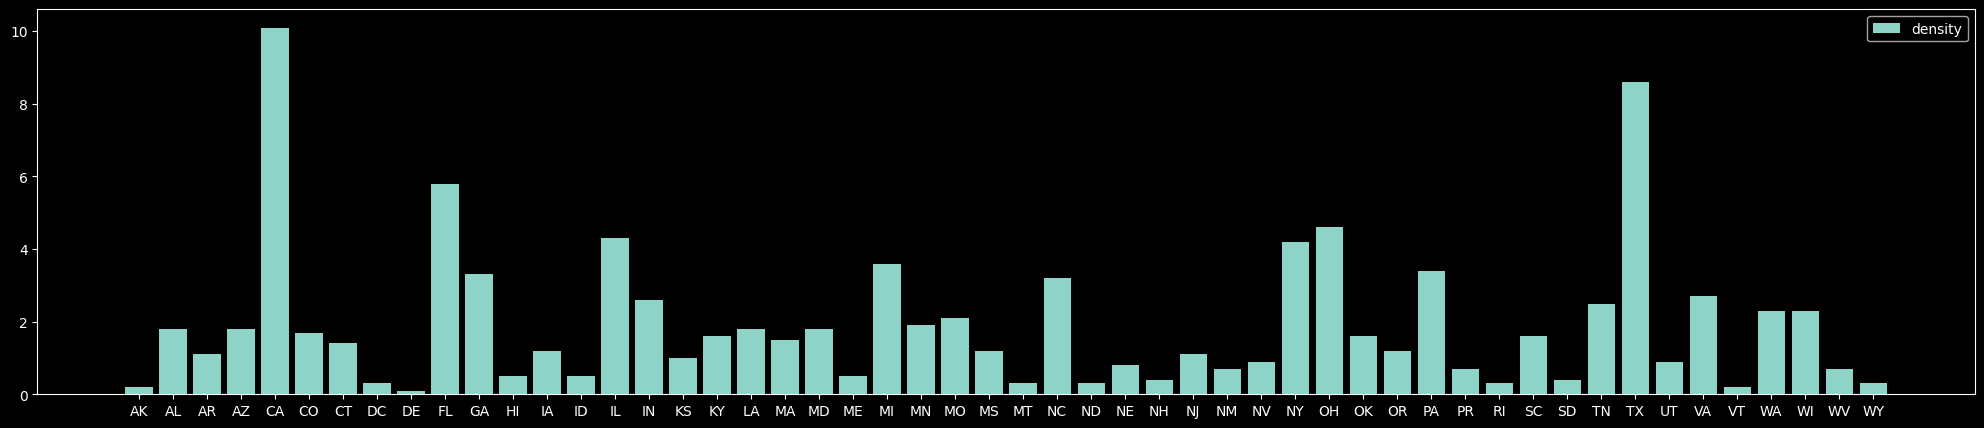

In [ ]:
# ▶ 52 states (State)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

plt.bar(df_density.index, df_density['density'], label='density');
plt.legend();
plt.gcf().set_size_inches(25, 5);

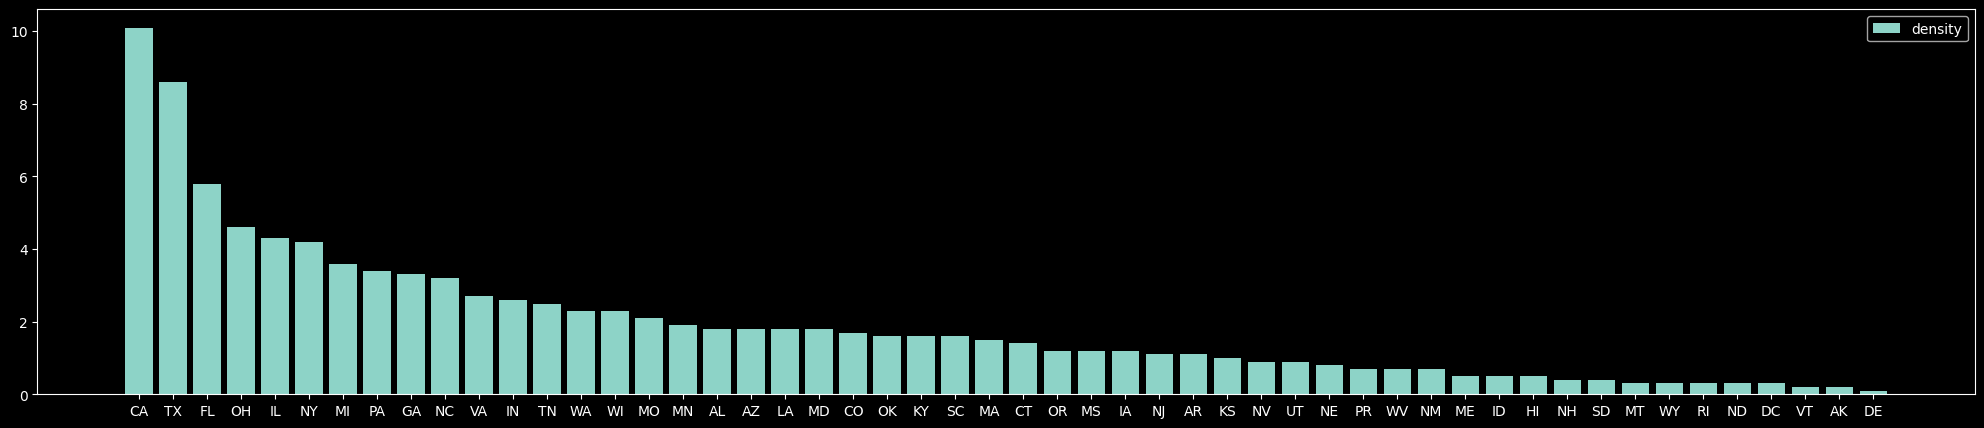

In [ ]:
# ▶ 52 states (State) Density of each other, alignment
# ▶ CA (California), ..., de (delaware)
df_density = df_density.sort_values(by=['density'], ascending=False)
plt.bar(df_density.index, df_density['density'], label='density');
plt.legend();
plt.gcf().set_size_inches(25, 5);

In [ ]:
# ▶ DE (Delaware), the lowest dense degree
from folium import Marker
from folium.plugins import MarkerCluster

df_DE = df[df['state']=='DE']

# ▶ Draw a basemap
m = folium.Map(location=[list(df_DE['latitude'])[0], list(df_DE['longitude'])[0]], tiles='openstreetmap', zoom_start=11)

# ▶ Add  points to the map
mc = MarkerCluster()
for _, row in df_DE.iterrows():
    mc.add_child(
        Marker(location = [row['latitude'], row['longitude']],
               popup=row['street_address']
              )
    )

m.add_child(mc)

# ▶ Display the map
m

### · Density analysis (City)
---





In [ ]:
df.head(5)

name                                  street_address        city state  \
0  Subway                           1800 Duke St, Ste 100  Alexandria    VA   
1  Subway                                   1512 King St,  Alexandria    VA   
2  Subway                            2361 Eisenhower Ave,  Alexandria    VA   
3  Subway                      320 King Street, 1st Floor  Alexandria    VA   
4  Subway  5836 N. Kings Hwy, Suite A, Huntington Station  Alexandria    VA   

  zip_code country  latitude  longitude  
0    22314     USA   38.8043   -77.0611  
1    22301     USA   38.8062   -77.0565  
2    22314     USA   38.8012   -77.0691  
3    22314     USA   38.8045   -77.0433  
4    22303     USA   38.7903   -77.0769

In [ ]:
# ▶ CITY, analysis of dense number of stores in each state compared to the total number of stores
df_density_city = pd.DataFrame(df.groupby(['state', 'city'])['street_address'].count()).reset_index()
df_density_city.columns=['state', 'city', 'cnt_city']
df_density_city.head(5)

state         city  cnt_city
0    AK    Anchorage        22
1    AK       Barrow         1
2    AK       Bethel         1
3    AK  Denali Park         1
4    AK   Dillingham         1

In [ ]:
# ▶ Calculates the number of stores to each state, not the density of the total number of stores.
df_density_state = pd.DataFrame(df.groupby(['state'])['street_address'].count()).reset_index()
df_density_state.columns = ['state', 'cnt_state']
df_density_state.head(5)

state  cnt_state
0    AK         63
1    AL        456
2    AR        283
3    AZ        453
4    CA       2590

In [ ]:
# ▶ Calculate the density of the number of stores in each state, not the density of the total number of stores, (※ LEFT JOIN)
df_merge = pd.merge(df_density_city, df_density_state, how='left', on='state')
df_merge['density'] = (df_merge['cnt_city'] / df_merge['cnt_state']) * 100
df_merge = df_merge.sort_values(by=['density'], ascending=False)
df_merge.head(10)

state         city  cnt_city  cnt_state    density
1376    DC   Washington        65         69  94.202899
6008    NV    Las Vegas       120        218  55.045872
2074    HI     Honolulu        44        115  38.260870
0       AK    Anchorage        22         63  34.920635
5935    NM  Albuquerque        50        176  28.409091
5642    NE        Omaha        44        206  21.359223
440     AZ      Phoenix        90        453  19.867550
8044    SD  Sioux Falls        19         98  19.387755
3812    MD    Baltimore        85        471  18.046709
5555    ND        Fargo        12         67  17.910448

In [ ]:
df_merge.tail(5)

state          city  cnt_city  cnt_state  density
987    CA  Sierra Madre         1       2590  0.03861
990    CA  Solana Beach         1       2590  0.03861
991    CA       Soledad         1       2590  0.03861
992    CA       Solvang         1       2590  0.03861
629    CA     Earlimart         1       2590  0.03861

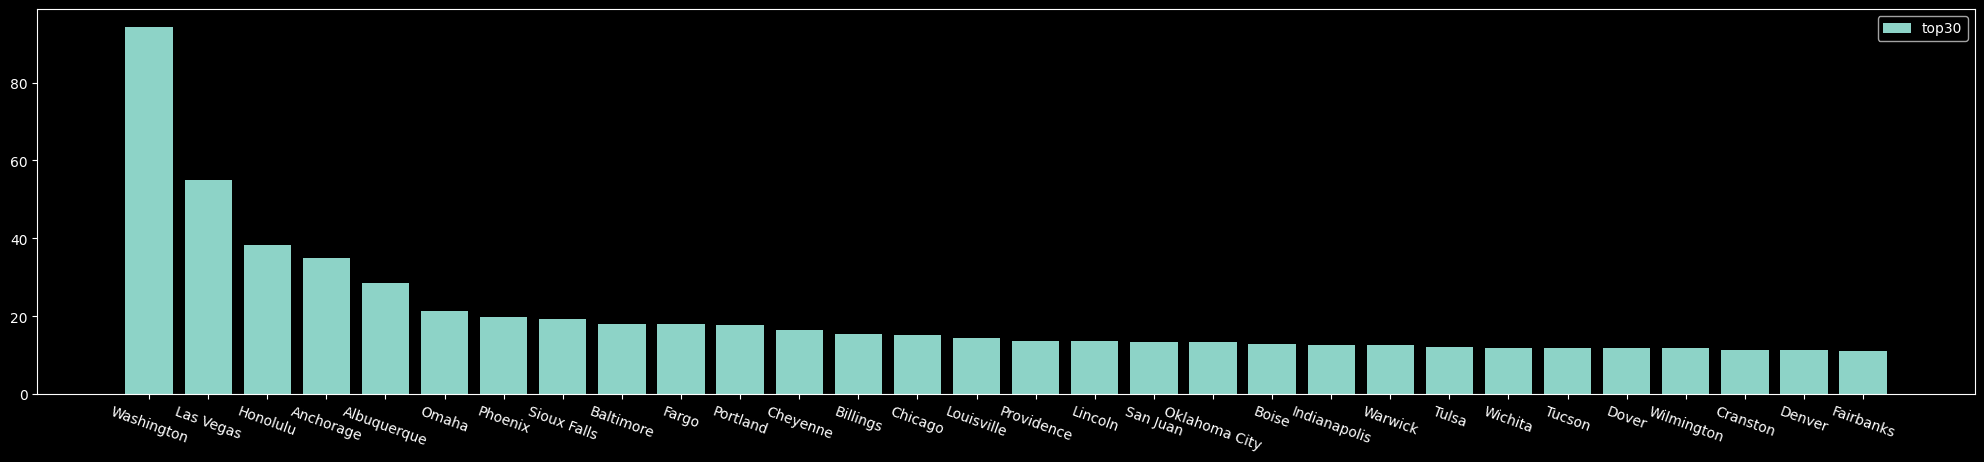

In [ ]:
# ▶ Top 30
# ▶ Washington, Las Vegas, the city is dense in order
df_merge_30h = df_merge.head(30)
plt.bar(df_merge_30h['city'], df_merge_30h['density'], label='top30');
plt.xticks(rotation=-20)
plt.legend()
plt.gcf().set_size_inches(25, 5);

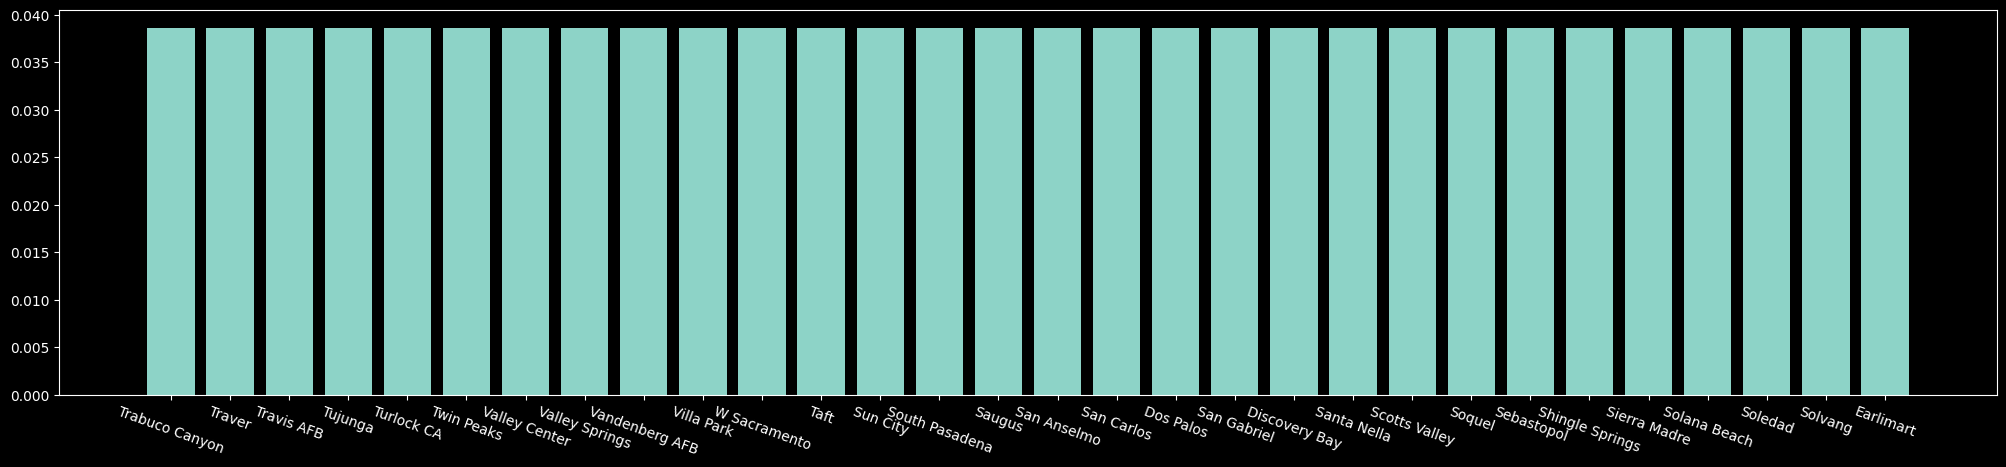

In [ ]:
# ▶ City density, Tail 30
# ▶ Subordinated cities have no big difference in density
df_merge_30t = df_merge.tail(30)
plt.bar(df_merge_30t['city'], df_merge_30t['density'], label='tail30');
plt.xticks(rotation=-20)
plt.gcf().set_size_inches(25, 5);

In [ ]:
# ▶ DE (Delaware), the lowest dense degree
from folium import Marker
from folium.plugins import MarkerCluster

df_DE = df[df['city']=='Sierra Madre']

# ▶ Draw a basemap
m = folium.Map(location=[list(df_DE['latitude'])[0], list(df_DE['longitude'])[0]], tiles='openstreetmap', zoom_start=11)

# ▶ Add  points to the map
mc = MarkerCluster()
for _, row in df_DE.iterrows():
    mc.add_child(
        Marker(location = [row['latitude'], row['longitude']],
               popup=row['street_address']
              )
    )

m.add_child(mc)

# ▶ Display the map
m

## ** 🥇Session 3 **
** ┗ New entry business search **
---


### · Commercial Strategic Planning (1)
---
* The high concentration of states means that there are many populations that can be consumed as much as
* Aims for areas with high concentration of states and low city density.


In [ ]:
# ▶
df_density.columns = ['cnt_state', 'total', 'density_state']
df_density = df_density.reset_index()
df_density.head(5)

state  cnt_state  total  density_state
0    CA       2590  25533           10.1
1    TX       2194  25533            8.6
2    FL       1490  25533            5.8
3    OH       1171  25533            4.6
4    IL       1110  25533            4.3

In [ ]:
# ▶ Bring only state density
df_density = df_density[['state', 'density_state']]
df_density.head(5)

state  density_state
0    CA           10.1
1    TX            8.6
2    FL            5.8
3    OH            4.6
4    IL            4.3

In [ ]:
# ▶ City density data reorganization
df_merge.columns = ['state', 'city', 'cnt_city', 'cnt_state', 'density_city']
df_merge = df_merge.reset_index(drop=True)
df_merge.head(5)

state         city  cnt_city  cnt_state  density_city
0    DC   Washington        65         69     94.202899
1    NV    Las Vegas       120        218     55.045872
2    HI     Honolulu        44        115     38.260870
3    AK    Anchorage        22         63     34.920635
4    NM  Albuquerque        50        176     28.409091

In [ ]:
# ▶ City dense data <STAET dense Left Join
df_merge = pd.merge(df_merge, df_density, how='left', on='state')
df_merge.head(5)

state         city  cnt_city  cnt_state  density_city  density_state
0    DC   Washington        65         69     94.202899            0.3
1    NV    Las Vegas       120        218     55.045872            0.9
2    HI     Honolulu        44        115     38.260870            0.5
3    AK    Anchorage        22         63     34.920635            0.2
4    NM  Albuquerque        50        176     28.409091            0.7

In [ ]:
# ▶ The main density of the main concentration, defined in strategic planning, and the urban density is low.
df_merge.sort_values(by=['density_state', 'density_city'], ascending = [False, True]).head(10)

state           city  cnt_city  cnt_state  density_city  density_state
9701    CA       Monrovia         1       2590       0.03861           10.1
9702    CA   Mount Shasta         1       2590       0.03861           10.1
9703    CA     Marin City         1       2590       0.03861           10.1
9704    CA       Oak Park         1       2590       0.03861           10.1
9705    CA       Maricopa         1       2590       0.03861           10.1
9706    CA         Marina         1       2590       0.03861           10.1
9707    CA  Mammoth Lakes         1       2590       0.03861           10.1
9708    CA      Morro Bay         1       2590       0.03861           10.1
9709    CA       Montrose         1       2590       0.03861           10.1
9710    CA         Mojave         1       2590       0.03861           10.1

In [ ]:
# ▶ 1st candidate area
df[(df['state']=='CA') & (df['city']=='Monrovia')]

name                             street_address      city state  \
8535  Subway  119 W. Foothill Blvd, #B, Foothill Center  Monrovia    CA   

     zip_code country  latitude  longitude  
8535    91016     USA   34.1515  -118.0018

In [ ]:
from folium import Marker
from folium.plugins import MarkerCluster

df_DE = df[df['state']=='CA']

# ▶ Draw a basemap
m = folium.Map(location=[34.1515, -118.0018], tiles='openstreetmap', zoom_start=11)

# ▶ Add  points to the map
mc = MarkerCluster()
for _, row in df_DE.iterrows():
    mc.add_child(
        Marker(location = [row['latitude'], row['longitude']],
               popup=row['street_address']
              )
    )

m.add_child(mc)

# ▶ Add Circle Marker in the 1st candidate area
folium.CircleMarker(
  [34.1515, -118.0018],
  radius=100,
  color='#ffffgg',
  fill_color='#fffggg',
  popup='New_in'
).add_to(m)

# ▶ Display the map
m

### · Commercial Strategic Planning (2)
---
* HWY (Highway) targets search for areas with low concentration on the highway as candidate sites


In [ ]:
df.head(10)

name                                     street_address        city  \
0  Subway                              1800 Duke St, Ste 100  Alexandria   
1  Subway                                      1512 King St,  Alexandria   
2  Subway                               2361 Eisenhower Ave,  Alexandria   
3  Subway                         320 King Street, 1st Floor  Alexandria   
4  Subway     5836 N. Kings Hwy, Suite A, Huntington Station  Alexandria   
5  Subway    101 Independence Ave S. E., Library of Congress  Washington   
6  Subway  Rayburn Bldg., 45 Independence Ave. SW, US Hou...  Washington   
7  Subway                                     430 8th St SE,  Washington   
8  Subway  1100 New Jersey Ave SE, 1st Floor, Federal Gat...  Washington   
9  Subway             50 Massachusetts Ave NE, Union Station  Washington   

  state zip_code country  latitude  longitude  
0    VA    22314     USA   38.8043   -77.0611  
1    VA    22301     USA   38.8062   -77.0565  
2    VA    22314     USA   38.8012   -77.0691  
3    VA    22314     USA   38.8045   -77.0433  
4    VA    22303     USA   38.7903   -77.0769  
5    DC    20540     USA   38.8871   -77.0041  
6    DC    20515     USA   38.8870   -77.0106  
7    DC    20003     USA   38.8829   -76.9946  
8    DC    20003     USA   38.8770   -77.0037  
9    DC    20002     USA   38.8971   -77.0064

In [ ]:
# ▶ Filter only data containing HWY based on address
df_hwy = df[df['street_address'].str.contains('Hwy')]
df_hwy.head(10)

name                                     street_address        city  \
4   Subway     5836 N. Kings Hwy, Suite A, Huntington Station  Alexandria   
17  Subway  3825 Jefferson Davis Hwy, Ste B, Potomac Yard ...  Alexandria   
29  Subway         30182 Sussex Hwy, Unit 2, Laurel Crossings      Laurel   
30  Subway                                   301 W Stein Hwy,     Seaford   
33  Subway                  8600 Ocean Hwy, Ste 4, Tiger Mart      Delmar   
48  Subway  16819 S. DuPont Hwy., Suite 100, Mattlind Squa...  Harrington   
49  Subway  11425 S.Dupont Hwy, N Rt 13 & Rt 12, Felton Go...      Felton   
50  Subway                          905 N Dupont Hwy, Ste 101     Milford   
51  Subway                           5502 S Dupont Hwy, Ste 3       Dover   
62  Subway  1200 Dupont Hwy, MLK Jr Student Center, Delawa...       Dover   

   state zip_code country  latitude  longitude  
4     VA    22303     USA   38.7903   -77.0769  
17    VA    22305     USA   38.8389   -77.0516  
29    DE    19956     USA   38.5756   -75.5666  
30    DE    19973     USA   38.6460   -75.6213  
33    MD    21875     USA   38.4292   -75.5651  
48    DE    19952     USA   38.9289   -75.5662  
49    DE    19943     USA   39.0076   -75.5687  
50    DE    19963     USA   38.9279   -75.4332  
51    DE    19901     USA   39.0727   -75.5533  
62    DE    19901     USA   39.1884   -75.5400

In [ ]:
# ▶ State search with the least stores on the highway based on the state
pd.DataFrame(df_hwy.groupby('state')['street_address'].count()).reset_index().sort_values(by=['street_address'], ascending=True).head(10)

state  street_address
20    ME               1
38    RI               3
27    ND               4
47    WV               4
18    MA               4
48    WY               5
30    NJ               7
6     CT               7
43    UT               8
40    SD               8

In [ ]:
df_hwy[df_hwy['state']=='ME']

name      street_address       city state    zip_code country  \
816  Subway  1560 Atlantic Hwy,  Waldoboro    ME  04572-9801     USA   

     latitude  longitude  
816   44.0964   -69.3736

In [ ]:
from folium import Marker
from folium.plugins import MarkerCluster

df_DE = df[df['state']=='ME']

# ▶ Draw a basemap
m = folium.Map(location=[list(df_DE['latitude'])[0], list(df_DE['longitude'])[0]], tiles='openstreetmap', zoom_start=11)

# ▶ Add  points to the map
mc = MarkerCluster()
for _, row in df_DE.iterrows():
    mc.add_child(
        Marker(location = [row['latitude'], row['longitude']],
               popup=row['street_address']
              )
    )

m.add_child(mc)

# ▶ Add 1 Circle Marker
folium.CircleMarker(
  [44.0964, -69.3736],
  radius=100,
  color='#ffffgg',
  fill_color='#fffggg',
  popup='New_in'
).add_to(m)

# ▶ Display the map
m